In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries 
import glob
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/Assignment 2/DS")

Preprocessing of Data


In [ ]:
# Get all the file names with extension 'csv'
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
# Create an empty dataframe
df1 = pd.DataFrame()

# Read the data from files
for name in all_filenames:
  # Open the file in read mode
  f = open(name, "r")

  # Read first line and get the optimized value to set it as target
  line1 = f.readline()
  target = line1.split(":",1)[1]
  target = target.strip("\n")

  # Create a numpy array to store all the value of each file
  data = np.array([])

  #Read each line to get value and append the value to the array created before(data) and them close the file
  for line in f:
    # Strip() and Split() used to get the list of values
    for lsplit in line.split():
      lsplit = lsplit.strip('[[]]')
      lsplit = lsplit.split()
      points = list(lsplit)
      if '' in points:
        points.remove('')
      data = np.append(data, points)
  f.close()

  # Append target value at last in numpy array
  data = np.append(data, target)

  # Create new dataframe to append the values of each file in columns of dataframe
  df_new = pd.DataFrame(np.column_stack(data))

  # Append the new dataframe to dataframe created before
  df1 = df1.append(df_new, ignore_index = True)
  print(df1.shape)

# print(df1.shape)

(1, 2501)
(2, 2501)
(3, 2501)
(4, 2501)
(5, 2501)
(6, 2501)
(7, 2501)
(8, 2501)
(9, 2501)
(10, 2501)
(11, 2501)
(12, 2501)
(13, 2501)
(14, 2501)
(15, 2501)
(16, 2501)
(17, 2501)
(18, 2501)
(19, 2501)
(20, 2501)
(21, 2501)
(22, 2501)
(23, 2501)
(24, 2501)
(25, 2501)
(26, 2501)
(27, 2501)
(28, 2501)
(29, 2501)
(30, 2501)
(31, 2501)
(32, 2501)
(33, 2501)
(34, 2501)
(35, 2501)
(36, 2501)
(37, 2501)
(38, 2501)
(39, 2501)
(40, 2501)
(41, 2501)
(42, 2501)
(43, 2501)
(44, 2501)
(45, 2501)
(46, 2501)
(47, 2501)
(48, 2501)
(49, 2501)
(50, 2501)
(51, 2501)
(52, 2501)
(53, 2501)
(54, 2501)
(55, 2501)
(56, 2501)
(57, 2501)
(58, 2501)
(59, 2501)
(60, 2501)
(61, 2501)
(62, 2501)
(63, 2501)
(64, 2501)
(65, 2501)
(66, 2501)
(67, 2501)
(68, 2501)
(69, 2501)
(70, 2501)
(71, 2501)
(72, 2501)
(73, 2501)
(74, 2501)
(75, 2501)
(76, 2501)
(77, 2501)
(78, 2501)
(79, 2501)
(80, 2501)
(81, 2501)
(82, 2501)
(83, 2501)
(84, 2501)
(85, 2501)
(86, 2501)
(87, 2501)
(88, 2501)
(89, 2501)
(90, 2501)
(91, 2501)
(92, 250

In [ ]:
# All the values in dataframe was string so convert it to float
df1 = df1.astype(str).astype(float)

# Set column name of target variable as 'Target'
df1 = df1.rename(columns={2500: 'Target'})
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,Target
0,400.0,148.0,24.0,118.0,468.0,343.0,191.0,436.0,185.0,251.0,458.0,73.0,201.0,387.0,162.0,375.0,369.0,222.0,263.0,35.0,456.0,456.0,175.0,428.0,23.0,439.0,209.0,177.0,213.0,337.0,279.0,427.0,144.0,60.0,393.0,342.0,64.0,23.0,447.0,81.0,...,29.0,460.0,427.0,319.0,286.0,238.0,149.0,314.0,426.0,157.0,382.0,443.0,140.0,91.0,424.0,496.0,452.0,470.0,78.0,59.0,109.0,229.0,49.0,472.0,465.0,425.0,122.0,203.0,207.0,61.0,279.0,47.0,91.0,71.0,115.0,62.0,176.0,400.0,455.0,1811.0
1,84.0,46.0,272.0,52.0,329.0,217.0,387.0,107.0,337.0,69.0,199.0,392.0,483.0,153.0,279.0,356.0,322.0,153.0,119.0,100.0,75.0,175.0,202.0,402.0,401.0,426.0,68.0,289.0,338.0,260.0,390.0,22.0,292.0,258.0,347.0,371.0,89.0,26.0,451.0,444.0,...,32.0,283.0,393.0,158.0,168.0,252.0,359.0,145.0,298.0,285.0,422.0,424.0,251.0,75.0,379.0,250.0,215.0,238.0,346.0,134.0,362.0,217.0,402.0,474.0,410.0,264.0,142.0,120.0,157.0,444.0,22.0,417.0,390.0,66.0,249.0,285.0,153.0,494.0,223.0,1714.0
2,30.0,250.0,155.0,390.0,171.0,455.0,479.0,156.0,47.0,330.0,440.0,238.0,345.0,261.0,281.0,45.0,266.0,320.0,444.0,33.0,270.0,106.0,193.0,263.0,323.0,41.0,308.0,269.0,120.0,47.0,138.0,400.0,464.0,231.0,121.0,305.0,104.0,289.0,139.0,44.0,...,459.0,365.0,146.0,290.0,423.0,174.0,264.0,280.0,431.0,482.0,111.0,276.0,126.0,452.0,247.0,154.0,61.0,449.0,303.0,496.0,321.0,385.0,138.0,369.0,160.0,458.0,316.0,401.0,126.0,410.0,347.0,342.0,81.0,459.0,378.0,332.0,116.0,45.0,45.0,1721.0
3,221.0,106.0,390.0,268.0,146.0,95.0,289.0,272.0,273.0,61.0,326.0,247.0,264.0,378.0,254.0,420.0,72.0,283.0,326.0,81.0,248.0,132.0,302.0,23.0,493.0,241.0,491.0,356.0,80.0,436.0,289.0,302.0,329.0,174.0,424.0,113.0,110.0,382.0,193.0,78.0,...,429.0,461.0,257.0,453.0,268.0,86.0,243.0,65.0,201.0,314.0,165.0,288.0,351.0,81.0,137.0,394.0,127.0,88.0,212.0,239.0,115.0,24.0,430.0,469.0,244.0,113.0,321.0,241.0,478.0,193.0,317.0,59.0,289.0,499.0,54.0,114.0,379.0,218.0,391.0,1713.0
4,156.0,499.0,284.0,25.0,300.0,40.0,346.0,108.0,190.0,458.0,358.0,320.0,124.0,93.0,283.0,103.0,64.0,273.0,449.0,225.0,487.0,54.0,497.0,420.0,207.0,204.0,175.0,423.0,301.0,20.0,306.0,139.0,354.0,36.0,326.0,79.0,345.0,435.0,295.0,443.0,...,316.0,30.0,236.0,293.0,230.0,205.0,484.0,77.0,89.0,366.0,240.0,419.0,225.0,325.0,136.0,214.0,24.0,85.0,472.0,478.0,470.0,371.0,154.0,410.0,374.0,94.0,395.0,468.0,25.0,315.0,348.0,312.0,420.0,295.0,327.0,68.0,271.0,302.0,47.0,1606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,342.0,401.0,112.0,480.0,22.0,155.0,395.0,393.0,392.0,199.0,37.0,418.0,247.0,417.0,388.0,277.0,265.0,75.0,173.0,87.0,150.0,166.0,400.0,81.0,284.0,117.0,268.0,159.0,313.0,483.0,69.0,144.0,497.0,160.0,175.0,69.0,376.0,79.0,260.0,366.0,...,35.0,243.0,99.0,338.0,270.0,485.0,182.0,36.0,210.0,157.0,148.0,240.0,419.0,138.0,352.0,271.0,341.0,247.0,455.0,140.0,393.0,24.0,317.0,472.0,150.0,409.0,163.0,126.0,92.0,222.0,349.0,250.0,43.0,458.0,221.0,127.0,140.0,316.0,452.0,1721.0
996,320.0,497.0,233.0,82.0,286.0,125.0,265.0,282.0,262.0,213.0,410.0,249.0,448.0,394.0,216.0,276.0,354.0,276.0,308.0,119.0,413.0,104.0,319.0,424.0,221.0,126.0,390.0,226.0,317.0,340.0,75.0,362.0,309.0,339.0,316.0,438.0,341.0,376.0,207.0,222.0,...,241.0,254.0,497.0,117.0,192.0,194.0,272.0,159.0,496.0,42.0,418.0,218.0,487.0,59.0,206.0,276.0,348.0,48.0,189.0,425.0,168.0,32.0,481.0,77.0,151.0,424.0,257.0,297.0,156.0,86.0,327.0,98.0,45.0,265.0,237.0,360.0,157.0,321.0,440.0,1827.0
997,472.0,172.0,83.0,478.0,113.0,297.0,

In [ ]:
# Apply Standard Scaling(Feature Scaling) on features of dataset
scaler = StandardScaler()
df1.iloc[:,0:2500] = scaler.fit_transform(df1.iloc[:,0:2500])

In [ ]:
# Store values of features in X and Target variable in y
X = df1.iloc[:,0:2500].values
y = df1["Target"].values

In [ ]:
# Spit the dataset into trainig and testing sets
# 70% trainig set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ANN Model

In [84]:
# declare epoches, batch size and activation function
verbose, epochs, batch_size = 1, 700, 64
activationFunction='relu'

# Define ANN model
def getANNModel():
  # Define layers in the model
  model = Sequential()
  model.add(Dense(100, input_dim = X.shape[1], activation=activationFunction))
  model.add(Dropout(0.25))
  model.add(Dense(75, activation=activationFunction))
  model.add(Dropout(0.25))
  model.add(Dense(50, activation=activationFunction))
  model.add(Dropout(0.25))
  model.add(Dense(25, activation=activationFunction))
  model.add(Dropout(0.25))
  # model.add(Dense(12, activation=activationFunction))
  # model.add(Dropout(0.25))
  # model.add(Dense(6, activation=activationFunction))
  # model.add(Dropout(0.25))
  model.add(Dense(1, activation ='linear'))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [85]:
# Create an ANN model
model_ANN = getANNModel()

In [ ]:
# Define a function to show result
# Used RMSE score as a performance metrics
def showResults(test, pred):
        mse = mean_squared_error(test, pred)
        rmse = sqrt(mse)
        print("RMSE: ", rmse)
        return rmse

In [86]:
# K-fold Cross-validation
skf = KFold(n_splits=5, shuffle=True)
foldNum=0

# split training data in training and validation set
for train_index, val_index in skf.split(X_train):
    foldNum+=1
    print("Results for fold",foldNum)
    X_Train, X_val = X_train[train_index], X_train[val_index]
    y_Train, y_val = y_train[train_index], y_train[val_index]
    
    # fit model on training set after the split
    history = model_ANN.fit(X_Train, y_Train, 
                        validation_data = (X_val, y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    # use validation set to predict values
    yPredict = model_ANN.predict(X_val)
    showResults(y_val, yPredict)

Streaming output truncated to the last 5000 lines.
Epoch 305/700
9/9 [==============================] - 0s 9ms/step - loss: 126936.0391 - val_loss: 27946.3457
Epoch 306/700
9/9 [==============================] - 0s 9ms/step - loss: 137273.1406 - val_loss: 30029.1777
Epoch 307/700
9/9 [==============================] - 0s 9ms/step - loss: 124997.0703 - val_loss: 22519.2246
Epoch 308/700
9/9 [==============================] - 0s 9ms/step - loss: 141209.5312 - val_loss: 28091.4062
Epoch 309/700
9/9 [==============================] - 0s 9ms/step - loss: 124902.7031 - val_loss: 28123.8438
Epoch 310/700
9/9 [==============================] - 0s 9ms/step - loss: 146080.8281 - val_loss: 34550.5430
Epoch 311/700
9/9 [==============================] - 0s 10ms/step - loss: 152005.2969 - val_loss: 40155.3789
Epoch 312/700
9/9 [==============================] - 0s 9ms/step - loss: 150737.2188 - val_loss: 15625.7354
Epoch 313/700
9/9 [==============================] - 0s 10ms/step - loss: 141718.312

CNN Model

In [ ]:
# declare epoches, batch size and activation function
verbose, epochs, batch_size = 1, 400, 64
activationFunction='relu'

# Define CNN model
def getCNNModel():

  # define layes in model
  model = Sequential()
  
  model.add(Conv1D(filters=100,  kernel_size = 5, strides=10, kernel_initializer='uniform', activation=activationFunction, input_shape = (X_train.shape[1],1)))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=3))
  
  model.add(Conv1D(filters=50, kernel_size=3, strides=5, activation=activationFunction))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=2))
  
  model.add(Conv1D(filters=25, kernel_size=3, strides=3, activation=activationFunction))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=1))
  
  model.add(Flatten())
  model.add(Dense(100, activation=activationFunction))
  model.add(Dropout(0.25))
  model.add(Dense(50, activation=activationFunction))
  model.add(Dropout(0.25))
  model.add(Dense(25, activation=activationFunction))
  model.add(Dropout(0.25))
  # model.add(Dense(12, activation=activationFunction))
  # model.add(Dense(6, activation=activationFunction))
  model.add(Dense(1, activation = 'linear'))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  
  return model

In [ ]:
# create CNN model
model_CNN = getCNNModel()

In [ ]:
# Expand the dimension of the features of training set
X_train_cnn = np.expand_dims(X_train, axis=2)

In [ ]:
# K-fold Cross-validation
skf = KFold(n_splits=5, shuffle=True)
foldNum=0

# split training data in training and validation set
for train_index, val_index in skf.split(X_train_cnn):
    foldNum+=1
    print("Results for fold",foldNum)
    X_Train, X_val = X_train_cnn[train_index], X_train_cnn[val_index]
    y_Train, y_val = y_train[train_index], y_train[val_index]
    
    # fit model on training set after the split
    history = model_CNN.fit(X_Train, y_Train, 
                        validation_data = (X_val, y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    # use validation set to predict values
    yPredict = model_CNN.predict(X_val)
    showResults(y_val, yPredict)

9/9 [==============================] - 0s 48ms/step - loss: 97021.1250 - val_loss: 9953.6562
Epoch 77/400
9/9 [==============================] - 0s 44ms/step - loss: 93406.2422 - val_loss: 4438.6978
Epoch 78/400
9/9 [==============================] - 0s 45ms/step - loss: 98610.0781 - val_loss: 9297.8105
Epoch 79/400
9/9 [==============================] - 0s 47ms/step - loss: 98189.6094 - val_loss: 10272.5342
Epoch 80/400
9/9 [==============================] - 0s 44ms/step - loss: 90646.4688 - val_loss: 7268.1182
Epoch 81/400
9/9 [==============================] - 0s 46ms/step - loss: 99851.6172 - val_loss: 6695.4648
Epoch 82/400
9/9 [==============================] - 0s 46ms/step - loss: 85297.3203 - val_loss: 6574.2329
Epoch 83/400
9/9 [==============================] - 0s 45ms/step - loss: 95342.5703 - val_loss: 5313.6533
Epoch 84/400
9/9 [==============================] - 0s 45ms/step - loss: 98130.2109 - val_loss: 14684.0020
Epoch 85/400
9/9 [==============================] - 0s 45

Save models and Plot graphs

In [91]:
# save the ANN model
model_ANN.save("1095526_ANN.h5")

In [92]:
# load ANN model and test the model on testing set
loaded_model = load_model('1095526_ANN.h5')
yPred = loaded_model.predict(X_test)
ann_result = showResults(y_test, yPred)

RMSE:  90.47307565958009


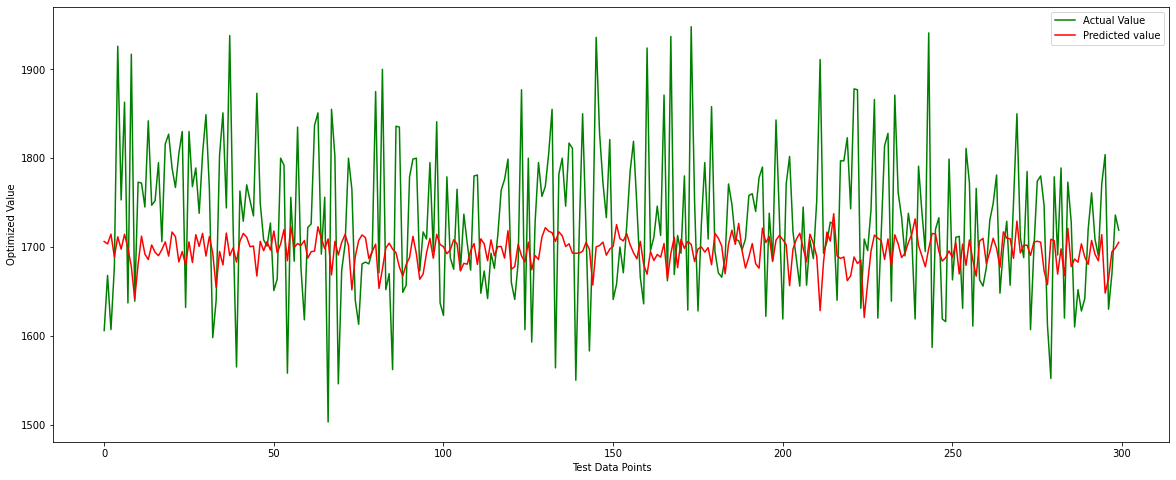

In [93]:
# plot the graph for ANN
plt.figure(figsize = (20,8))
plt.plot(y_test,color='green')
plt.plot(yPred, color='red')
plt.ylabel('Optimized Value') 
plt.xlabel('Test Data Points')
plt.legend(['Actual Value', 'Predicted value'], loc='upper right') 

In [ ]:
# Expand the dimension of the features of testing set
X_test_cnn = np.expand_dims(X_test, axis=2)

In [94]:
# save the CNN model
model_CNN.save("1095526_CNN.h5")

In [95]:
# load CNN model and test the mmodel on testing set
loaded_model = load_model('1095526_CNN.h5')
yPred = loaded_model.predict(X_test_cnn)
cnn_result=showResults(y_test, yPred)

RMSE:  115.85350403826082


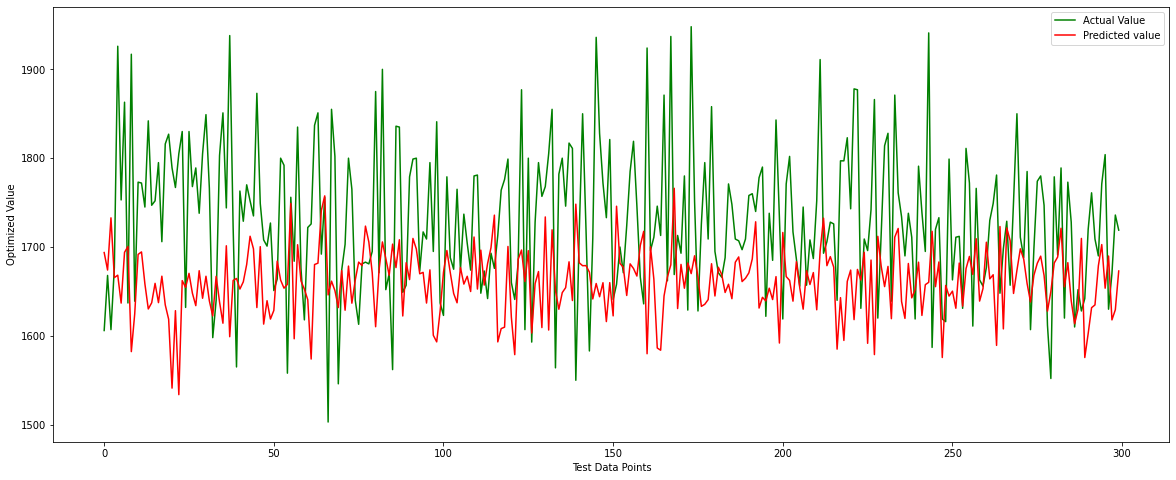

In [96]:
# plot the graph for CNN
plt.figure(figsize = (20,8))
plt.plot(y_test,color='green')
plt.plot(yPred, color='red')
plt.ylabel('Optimized Value') 
plt.xlabel('Test Data Points')
plt.legend(['Actual Value', 'Predicted value'], loc='upper right') 

Comparision of RMSE Preformance Metrics

In [97]:
# Create a list of RMSE loss of both the model
comp = [ann_result,cnn_result]

# Show comparision of the performance of the models
comparision = pd.DataFrame(comp)
comparision = comparision.rename(columns={0:'RMSE Loss'}, index={0: 'ANN',1:'CNN'})
comparision

,RMSE Loss
ANN,90.473076
CNN,115.853504
